# Uploading dataset

In [0]:
from google.colab import files
uploaded = files.upload()

#Download teh data from https://archive.ics.uci.edu/ml/datasets/Daily+Demand+Forecasting+Orders#

Saving Daily_Demand_Forecasting_Orders.csv to Daily_Demand_Forecasting_Orders.csv


In [0]:
# importing libraries
import io
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

The dataset considered is the [Daily Demand Forecasting Orders Data Set](https://archive.ics.uci.edu/ml/datasets/Daily+Demand+Forecasting+Orders).

In [0]:
# reading the dataset

df = pd.read_csv(io.BytesIO(uploaded['Daily_Demand_Forecasting_Orders.csv']))

In [0]:
df.head()

,Week of the month (first week,second,third,fourth or fifth week;Day of the week (Monday to Friday);Non-urgent order;Urgent order;Order type A;Order type B;Order type C;Fiscal sector orders;Orders from the traffic controller sector;Banking orders (1);Banking orders (2);Banking orders (3);Target (Total orders)
0,1;4;316.307;223.270;61.543;175.586;302.448;0;6...,NaN,NaN,NaN
1,1;5;128.633;96.042;38.058;56.037;130.580;0;404...,NaN,NaN,NaN
2,1;6;43.651;84.375;21.826;25.125;82.461;1.386;1...,NaN,NaN,NaN
3,2;2;171.297;127.667;41.542;113.294;162.284;18....,NaN,NaN,NaN
4,2;3;90.532;113.526;37.679;56.618;116.220;6.459...,NaN,NaN,NaN


In [0]:
# reading the dataset

df = pd.read_csv(io.BytesIO(uploaded['Daily_Demand_Forecasting_Orders.csv']), sep=';')

In [0]:
df.head()

,Week,Day,Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517


# Exploratory Data Analysis

In [0]:
df.rename(columns={'Week of the month (first week, second, third, fourth or fifth week':'Week', 'Day of the week (Monday to Friday)':'Day'}, inplace=True)

In [0]:
df.shape

(60, 13)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
Week                                         60 non-null int64
Day                                          60 non-null int64
Non-urgent order                             60 non-null float64
Urgent order                                 60 non-null float64
Order type A                                 60 non-null float64
Order type B                                 60 non-null float64
Order type C                                 60 non-null float64
Fiscal sector orders                         60 non-null float64
Orders from the traffic controller sector    60 non-null int64
Banking orders (1)                           60 non-null int64
Banking orders (2)                           60 non-null int64
Banking orders (3)                           60 non-null int64
Target (Total orders)                        60 non-null float64
dtypes: float64(7), int64(6)
memory usage: 6.2 KB


Observation : Dataypes fine, no missing values. 

In [0]:
df.describe()

,Week,Day,Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,3.016667,4.033333,172.554933,118.920850,52.112217,109.229850,139.531250,77.396133,44504.350000,46640.833333,79401.483333,23114.633333,300.873317
std,1.282102,1.401775,69.505788,27.170929,18.829911,50.741388,41.442932,186.502470,12197.905134,45220.736293,40504.420041,13148.039829,89.602041
min,1.000000,2.000000,43.651000,77.371000,21.826000,25.125000,74.372000,0.000000,11992.000000,3452.000000,16411.000000,7679.000000,129.412000
25%,2.000000,3.000000,125.348000,100.888000,39.456250,74.916250,113.632250,1.243250,34994.250000,20130.000000,50680.500000,12609.750000,238.195500
50%,3.000000,4.000000,151.062500,113.114500,47.166500,99.482000,127.990000,7.831500,44312.000000,32527.500000,67181.000000,18011.500000,288.034500
75%,4.000000,5.000000,194.606500,132.108250,58.463750,132.171000,160.107500,20.360750,52111.750000,45118.750000,94787.750000,31047.750000,334.237250
max,5.000000,6.000000,435.304000,223.270000,118.178000,267.342000,302.448000,865.000000,71772.000000,210508.000000,188411.000000,73839.000000,616.453000


Observations : Scaling necessary.

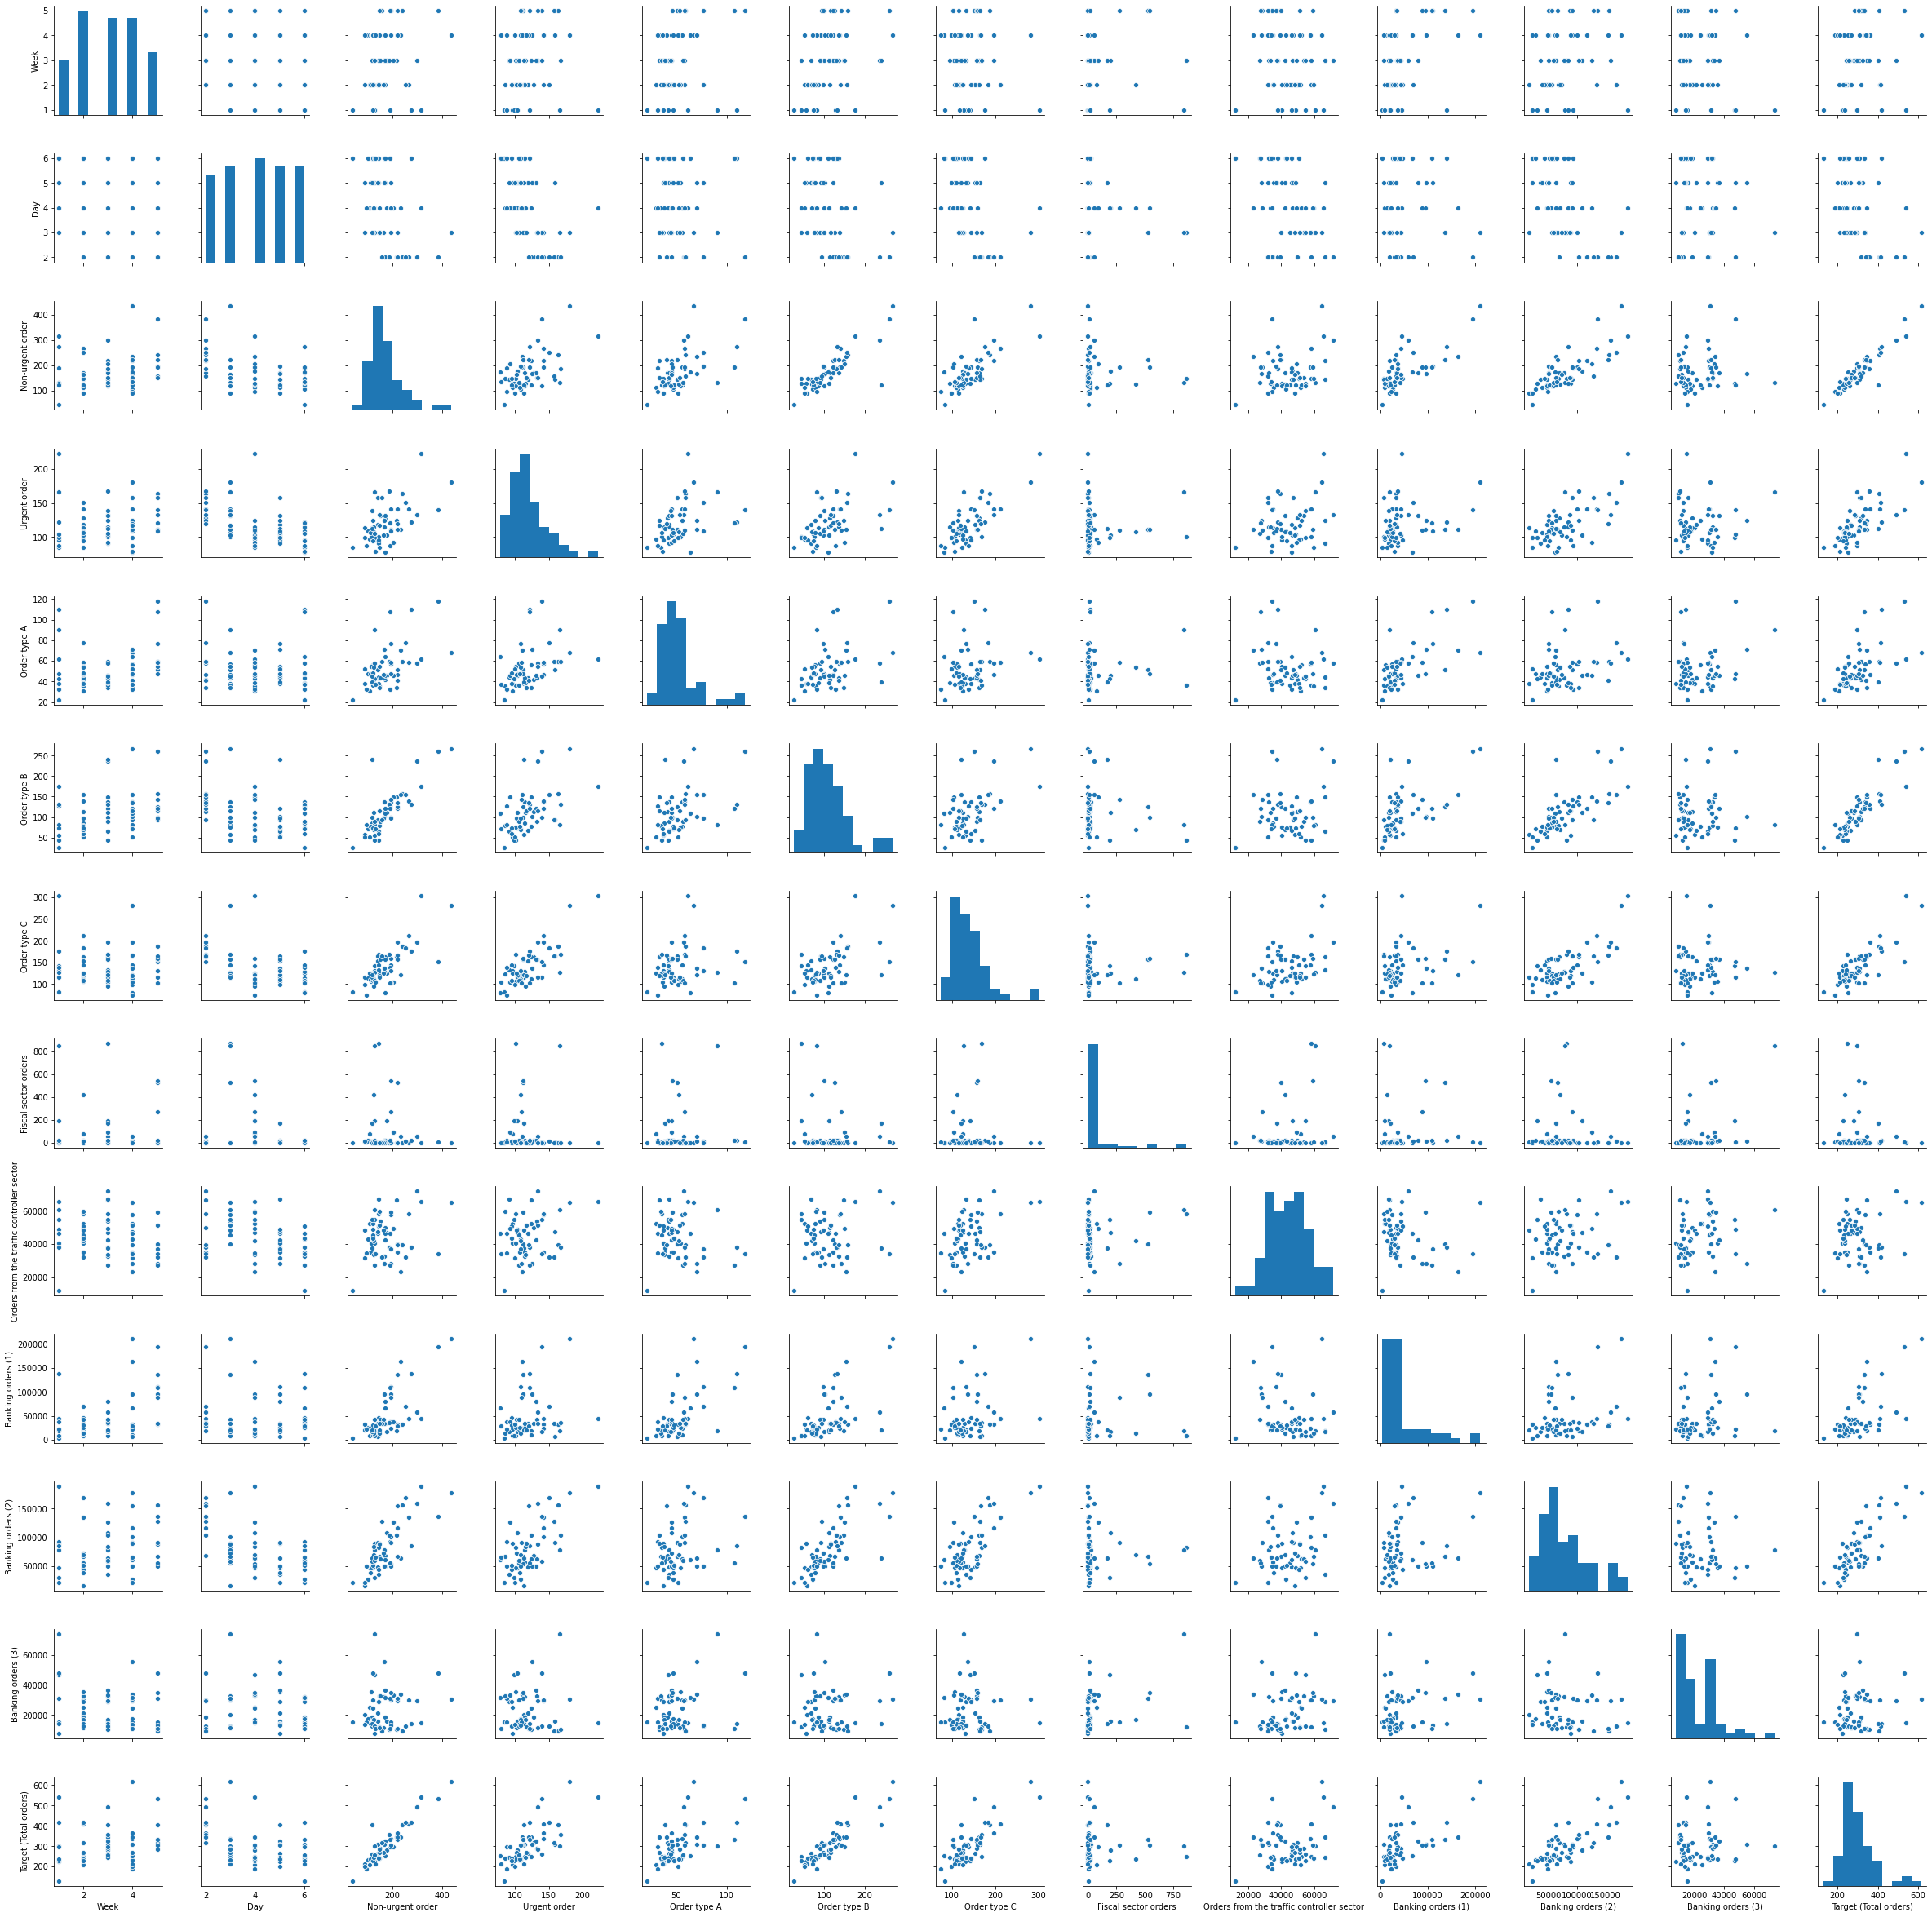

In [0]:
sns.pairplot(df)

Observation : Not really helpful.

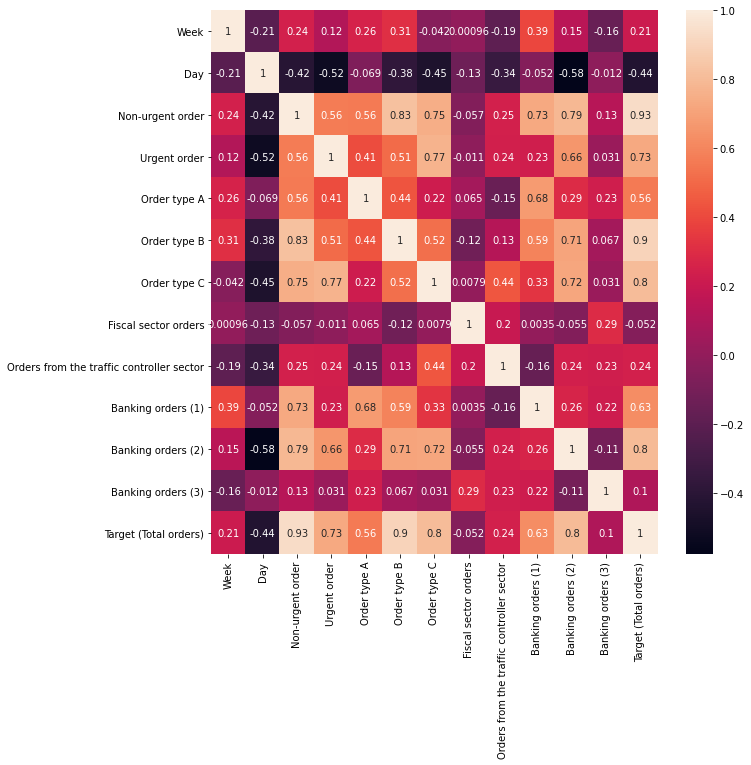

In [0]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)


Observation :

In [0]:
df.columns

In [0]:
df1 = df[["Non-urgent order", 'Order type B', 'Order type C', 'Banking orders (2)', "Target (Total orders)"]].copy()
df1.head()

,Non-urgent order,Order type B,Order type C,Banking orders (2),Target (Total orders)
0,316.307,175.586,302.448,188411,539.577
1,128.633,56.037,130.580,89461,224.675
2,43.651,25.125,82.461,21305,129.412
3,171.297,113.294,162.284,69054,317.120
4,90.532,56.618,116.220,16411,210.517


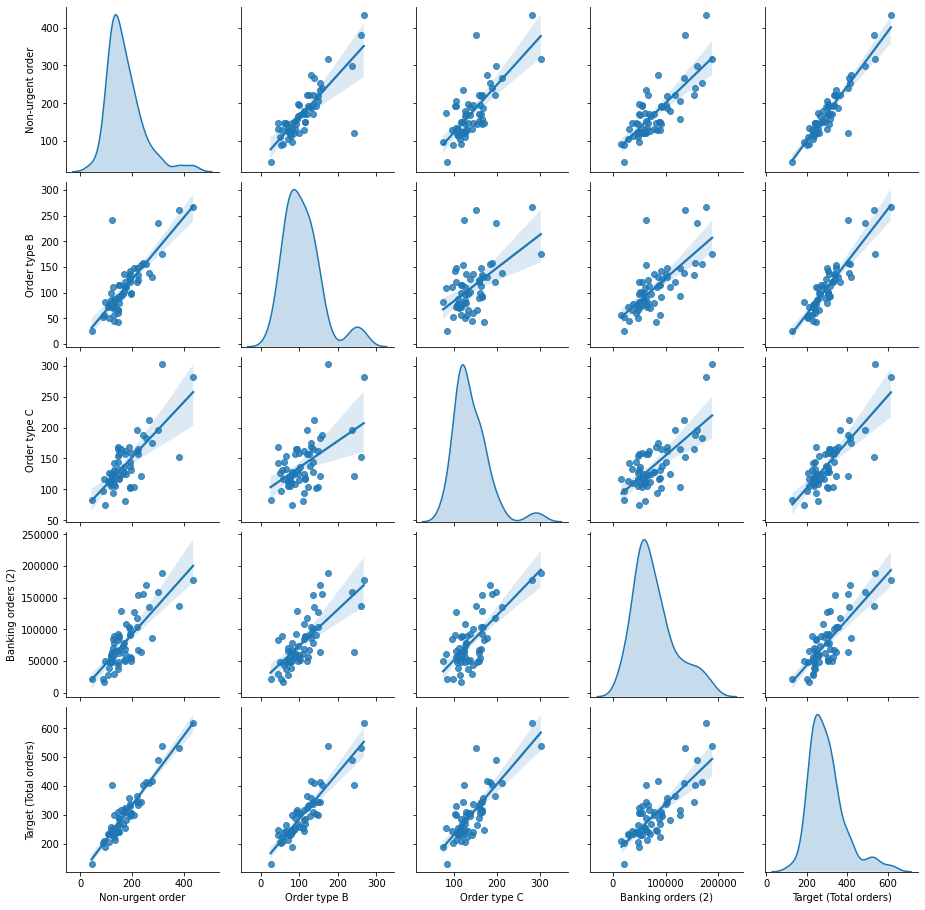

In [0]:
sns.pairplot(df1, kind='reg', diag_kind='kde')

Observation : 

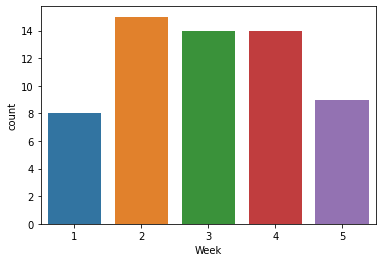

In [0]:
sns.countplot(df.Week)

Observation : The count is is varying with week, hence it has a role to play in determining target variable. 

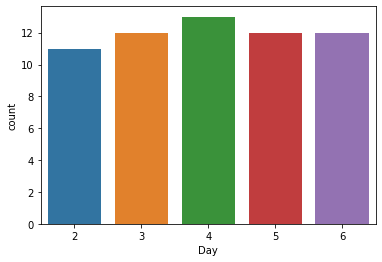

In [0]:
sns.countplot(df.Day)

Onservation : Maybe not a major role. 

# One hot encoding

It refers to splitting the column which contains numerical categorical data to many columns depending on the number of categories present in that column. Each column contains “0” or “1” corresponding to which column it has been placed.

For eg.,

 Country |
 ---|
 India |
 Nepal |
 Bhutan | 

 Country_India | Country_Nepal | Country_Bhutan 
 ---|:---|:---
 1 | 0 | 0
 0 | 1 | 0
 0 | 0 | 1 

In [0]:
df1 = pd.get_dummies(df, columns=["Week", "Day"])

In [0]:
df1.head()

,Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders),Week_1,Week_2,Week_3,Week_4,Week_5,Day_2,Day_3,Day_4,Day_5,Day_6
0,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577,1,0,0,0,0,0,0,1,0,0
1,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675,1,0,0,0,0,0,0,0,1,0
2,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412,1,0,0,0,0,0,0,0,0,1
3,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120,0,1,0,0,0,1,0,0,0,0
4,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517,0,1,0,0,0,0,1,0,0,0


In [0]:
df1.shape

(60, 21)

# Train-test split

In [0]:
y = df1["Target (Total orders)"].copy()
y.head()

0    539.577
1    224.675
2    129.412
3    317.120
4    210.517
Name: Target (Total orders), dtype: float64

In [0]:
X = df1.drop("Target (Total orders)", axis=1)
X.head()

,Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Week_1,Week_2,Week_3,Week_4,Week_5,Day_2,Day_3,Day_4,Day_5,Day_6
0,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,1,0,0,0,0,0,0,1,0,0
1,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,1,0,0,0,0,0,0,0,1,0
2,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,1,0,0,0,0,0,0,0,0,1
3,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,0,1,0,0,0,1,0,0,0,0
4,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,0,1,0,0,0,0,1,0,0,0


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [0]:
print(len(X_train))
print(len(X_test))

40
20


In [0]:
X_train.shape

(40, 20)

# Scaling

In [0]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Linear Regression
##Multivariate Linear Regression

$ y = \beta_0 + \beta_1*X_1 + \beta_2*X_2 + ... + \beta_n*X_n$

In [0]:
reg = LinearRegression().fit(X_train, y_train)

In [0]:
reg.score(X_test, y_test)

0.8471178917782948

In [0]:
reg.coef_

array([ 7.04356151e-15, -2.84217094e-14,  1.80876009e+01,  4.57239630e+01,
        3.75798896e+01,  1.28283741e-14, -4.01740779e-15, -1.45022783e-14,
       -2.34001834e-14,  3.77031600e-15, -8.27110013e-15, -1.84227784e-14,
       -1.85475103e-14, -3.95999676e-14, -1.46142546e-14,  1.30801532e-14,
        1.27027307e-14, -1.99840144e-15,  5.32907052e-15,  6.66133815e-15])

In [0]:
reg.coef_.shape

(20,)

In [0]:
reg.intercept_

289.56505

In [0]:
mean_squared_error(y_test, reg.predict(X_test))

1388.2458630415517

In [0]:
reg.predict(X_test)

array([466.72711468, 191.18260837, 468.90359818, 317.98583283,
       321.09605509, 197.4871902 , 310.88735402, 355.94183968,
       276.73842985, 274.80012595, 236.19788344, 304.25426635,
       288.90400245, 282.9867786 , 177.27443574, 214.54201676,
       305.21294156, 238.01299084, 367.47419102, 194.6913444 ])

# Regression with polynomial features



For one feature variable X - 

$ y = \beta_0 + \beta_1*X + \beta_2*X^2 + \beta_3*X^3 + ... + \beta_n*X^n$

Polynomial Regression with degree 2 for 2 features - 

$ y = \beta_0 + \beta_1*X_1 + \beta_2*X_1^2 + \beta_3*X_1*X_2 + \beta_4*X_2 + \beta_5*X_2^2 $

In [0]:
from sklearn.preprocessing import PolynomialFeatures

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [0]:
poly = PolynomialFeatures()

X_train1 = poly.fit_transform(X_train)
X_test1 = poly.fit_transform(X_test)

In [0]:
len(X_train1[0])

231

In [0]:
reg = LinearRegression().fit(X_train1, y_train)

In [0]:
reg.score(X_test1, y_test)

0.4359143223234725